## MNIST Digit Recognition: 

#### Installing python and all the various packages.


Python is a great language for machine learning but installing all the packages and figuring out dependencies can be a little annoying sometimes. Here's a brief intro to how to do this:

- Download the anaconda pyton distribution https://www.continuum.io/downloads - this is basic a bundled distrubution of the various python scientific packages (numpy, scipy, pandas, sklearn). Once you installed anaconda you can go to the terminal/command line and type 

     `jupyter notebook`

and press enter - you should get an empty notebook like this one where you can type code and text.

To install the deep learning stuff you'll need to install tensorflow (or theano) and keras:

- If you want to use tensorflow run the following command from the terminal - this might only work for mac or linux:

    `conda install -c jjhelmus tensorflow=0.10.0rc0`
    
    
- Finally install keras running 

    `pip install keras`
    
from the terminal.


### Loading in the packges and data:

In [1]:
import numpy as np 
import pandas as pd
#import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
data = pd.read_csv("train.csv")

### Looking at the Data:

In [3]:
data.shape

(42000, 785)

In [4]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X = data.loc[:,"pixel0":"pixel783"].values
y = data["label"]

In [15]:
img = X[120] #200

In [16]:
img = img.reshape(28, 28)

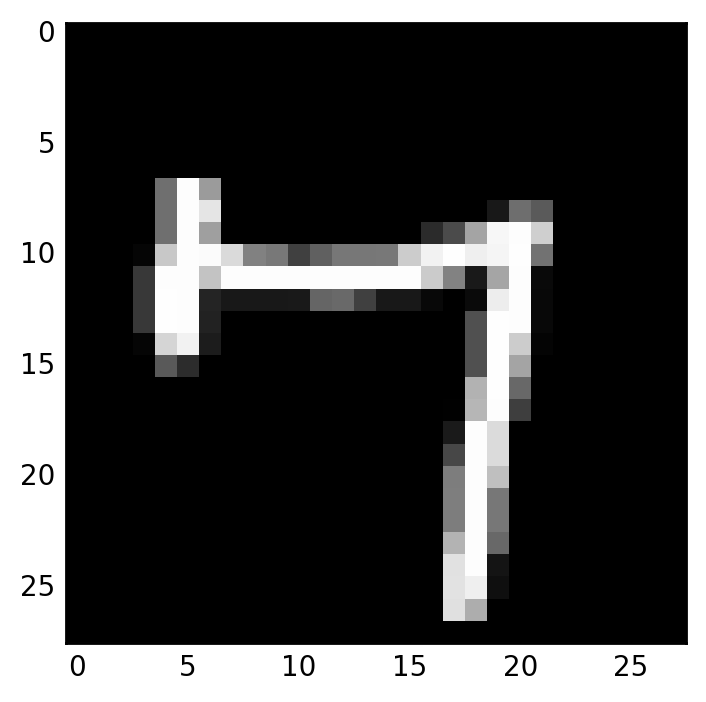

In [17]:
plt.imshow(img, cmap = "gray", interpolation="none")

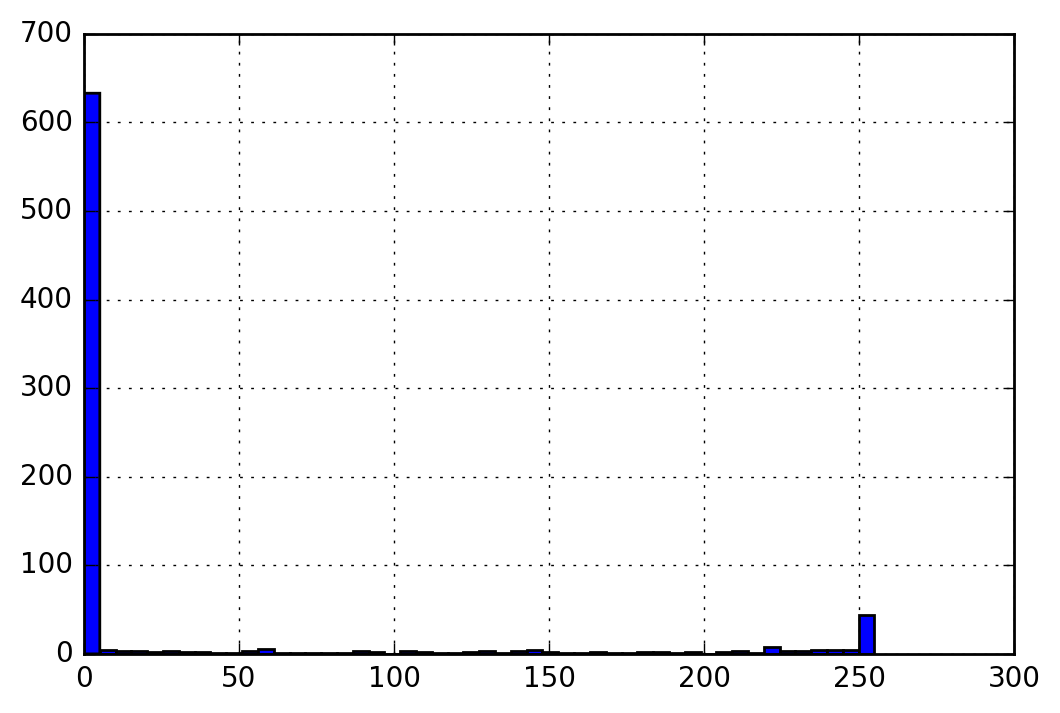

In [11]:
pd.Series(X[30]).hist(bins = 50)

### Creating Features a.k.a Human Learning:

In [18]:
import seaborn as sns

In [19]:
data["mean_intensity"] = X.mean(1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1137bdc50>]], dtype=object)

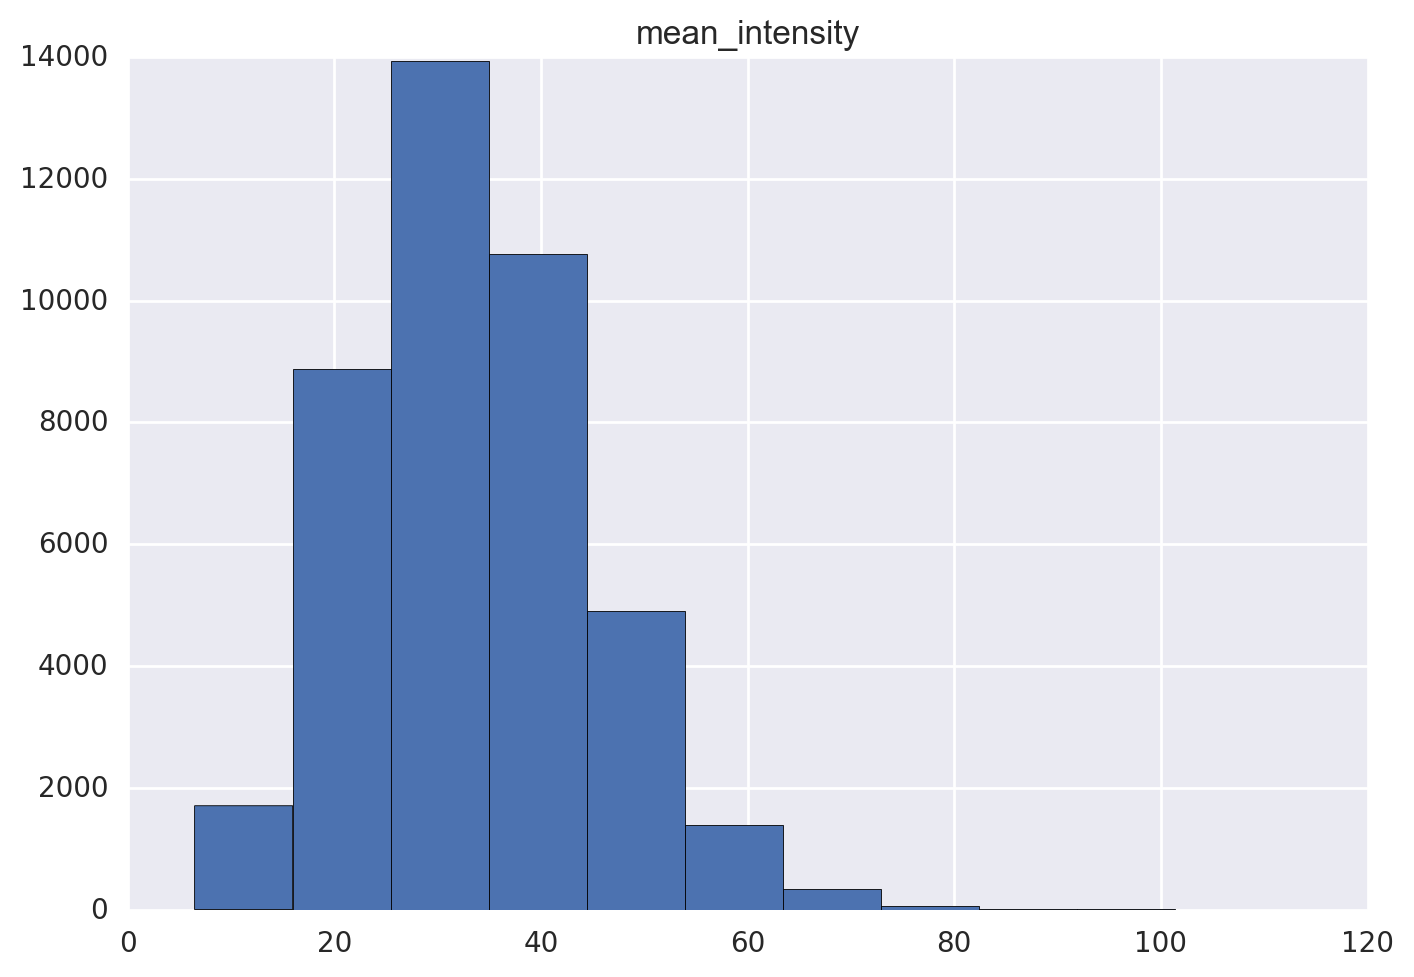

In [20]:
data.hist("mean_intensity")

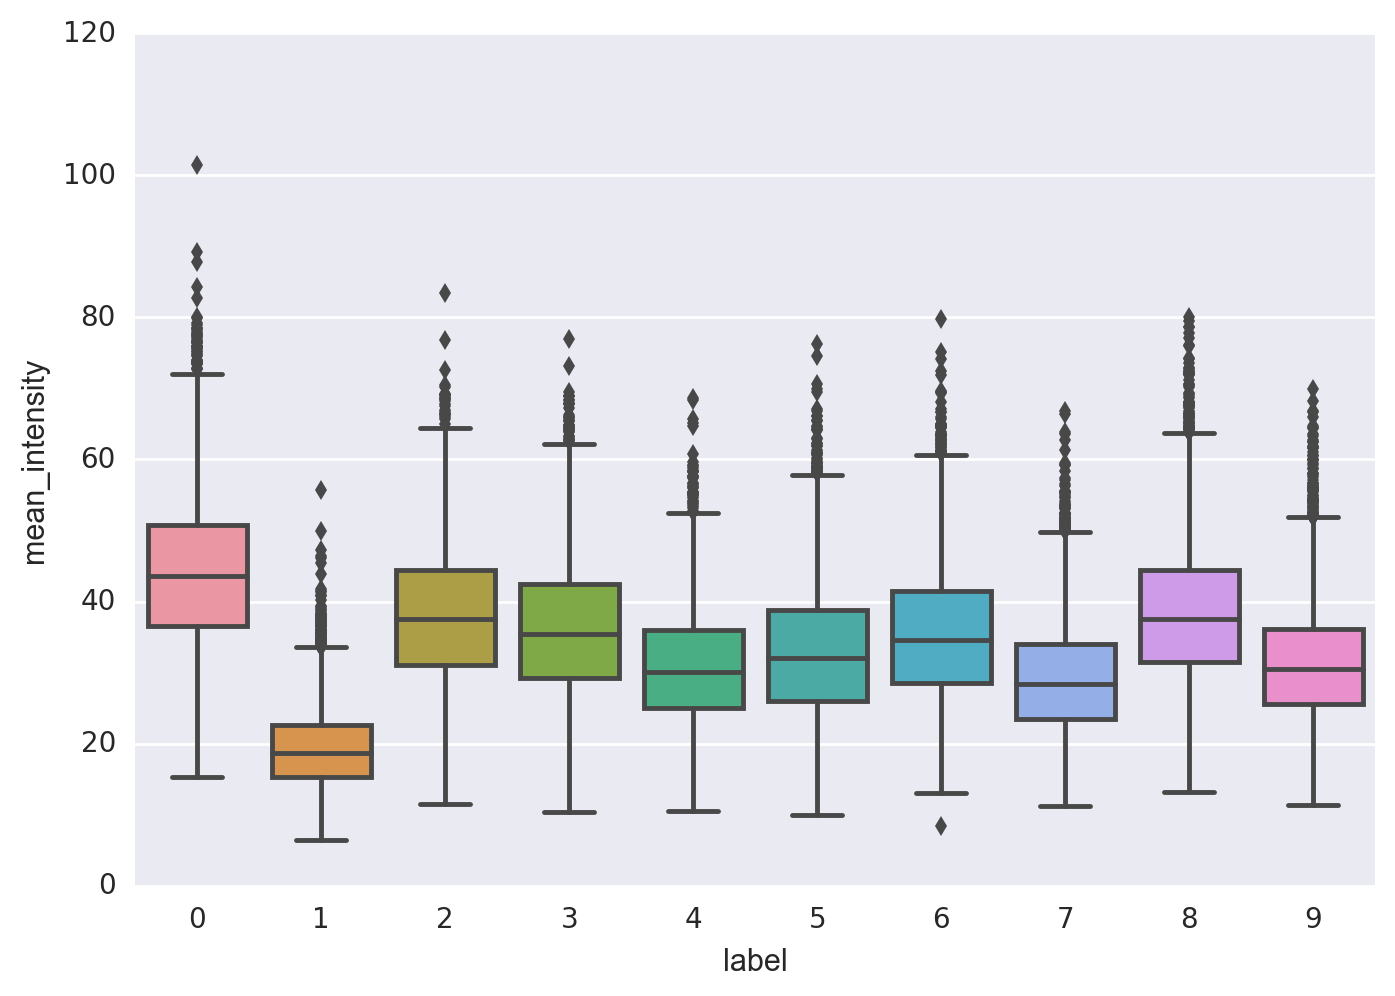

In [21]:
sns.boxplot(x = "label", y = "mean_intensity", data = data)

### Unsupervized Learning: Dimensionality Reduction:

In [22]:
from sklearn.decomposition import PCA

In [23]:
X = X/255

In [24]:
pca = PCA(n_components=2)

In [25]:
X_proj = pca.fit_transform(X)

In [26]:
X_proj

array([[ 2.59449325,  2.74239737],
       [-6.67235955,  1.41392767],
       [ 3.47801739,  1.15202268],
       ..., 
       [-1.31870581, -3.72555012],
       [-1.28391918, -0.24320035],
       [ 1.42842823, -1.64271775]])

In [ ]:
pca.components_

In [28]:
pca.explained_variance_ratio_

array([ 0.09748938,  0.07160266])

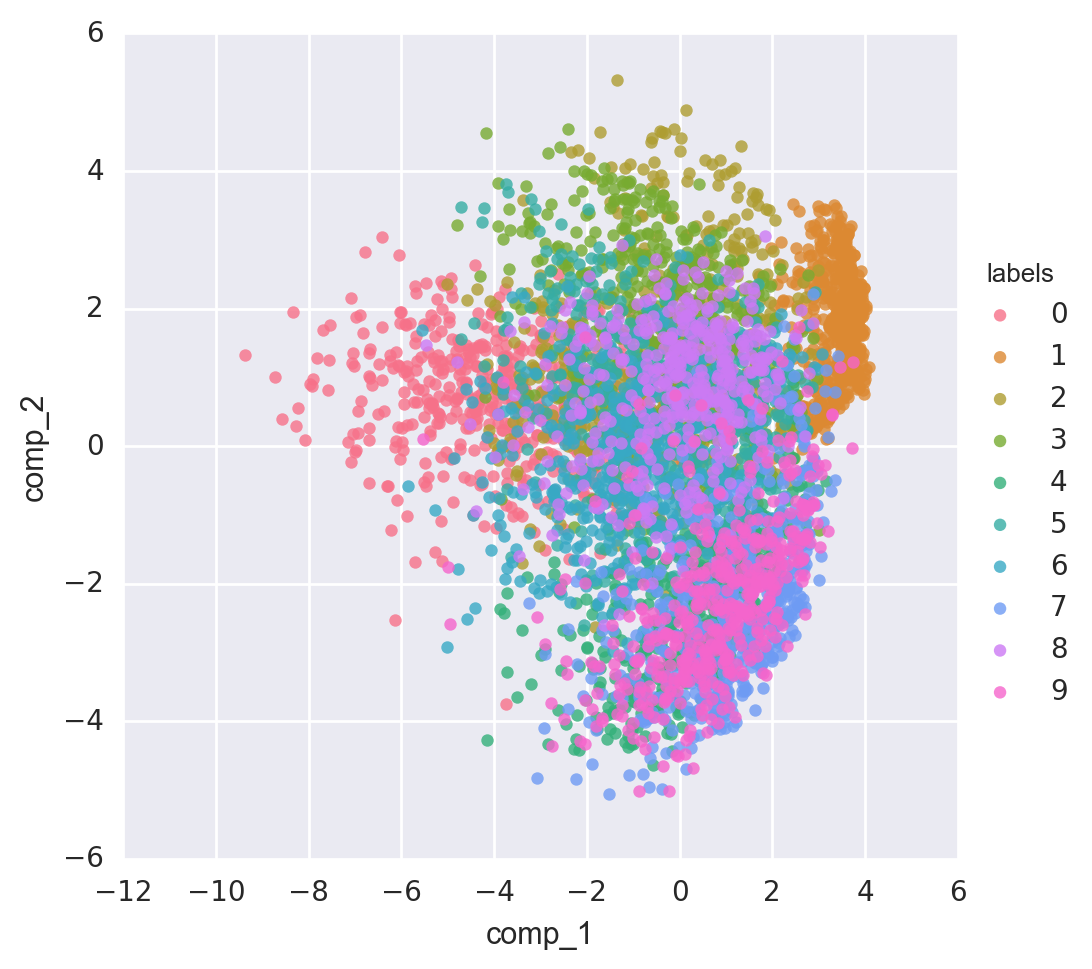

In [27]:
proj = pd.DataFrame(X_proj[:5000,:2])
proj.columns = ["comp_1", "comp_2"]
proj["labels"] = y[:5000]
sns.lmplot("comp_1", "comp_2", hue = "labels",data = proj,fit_reg=False)

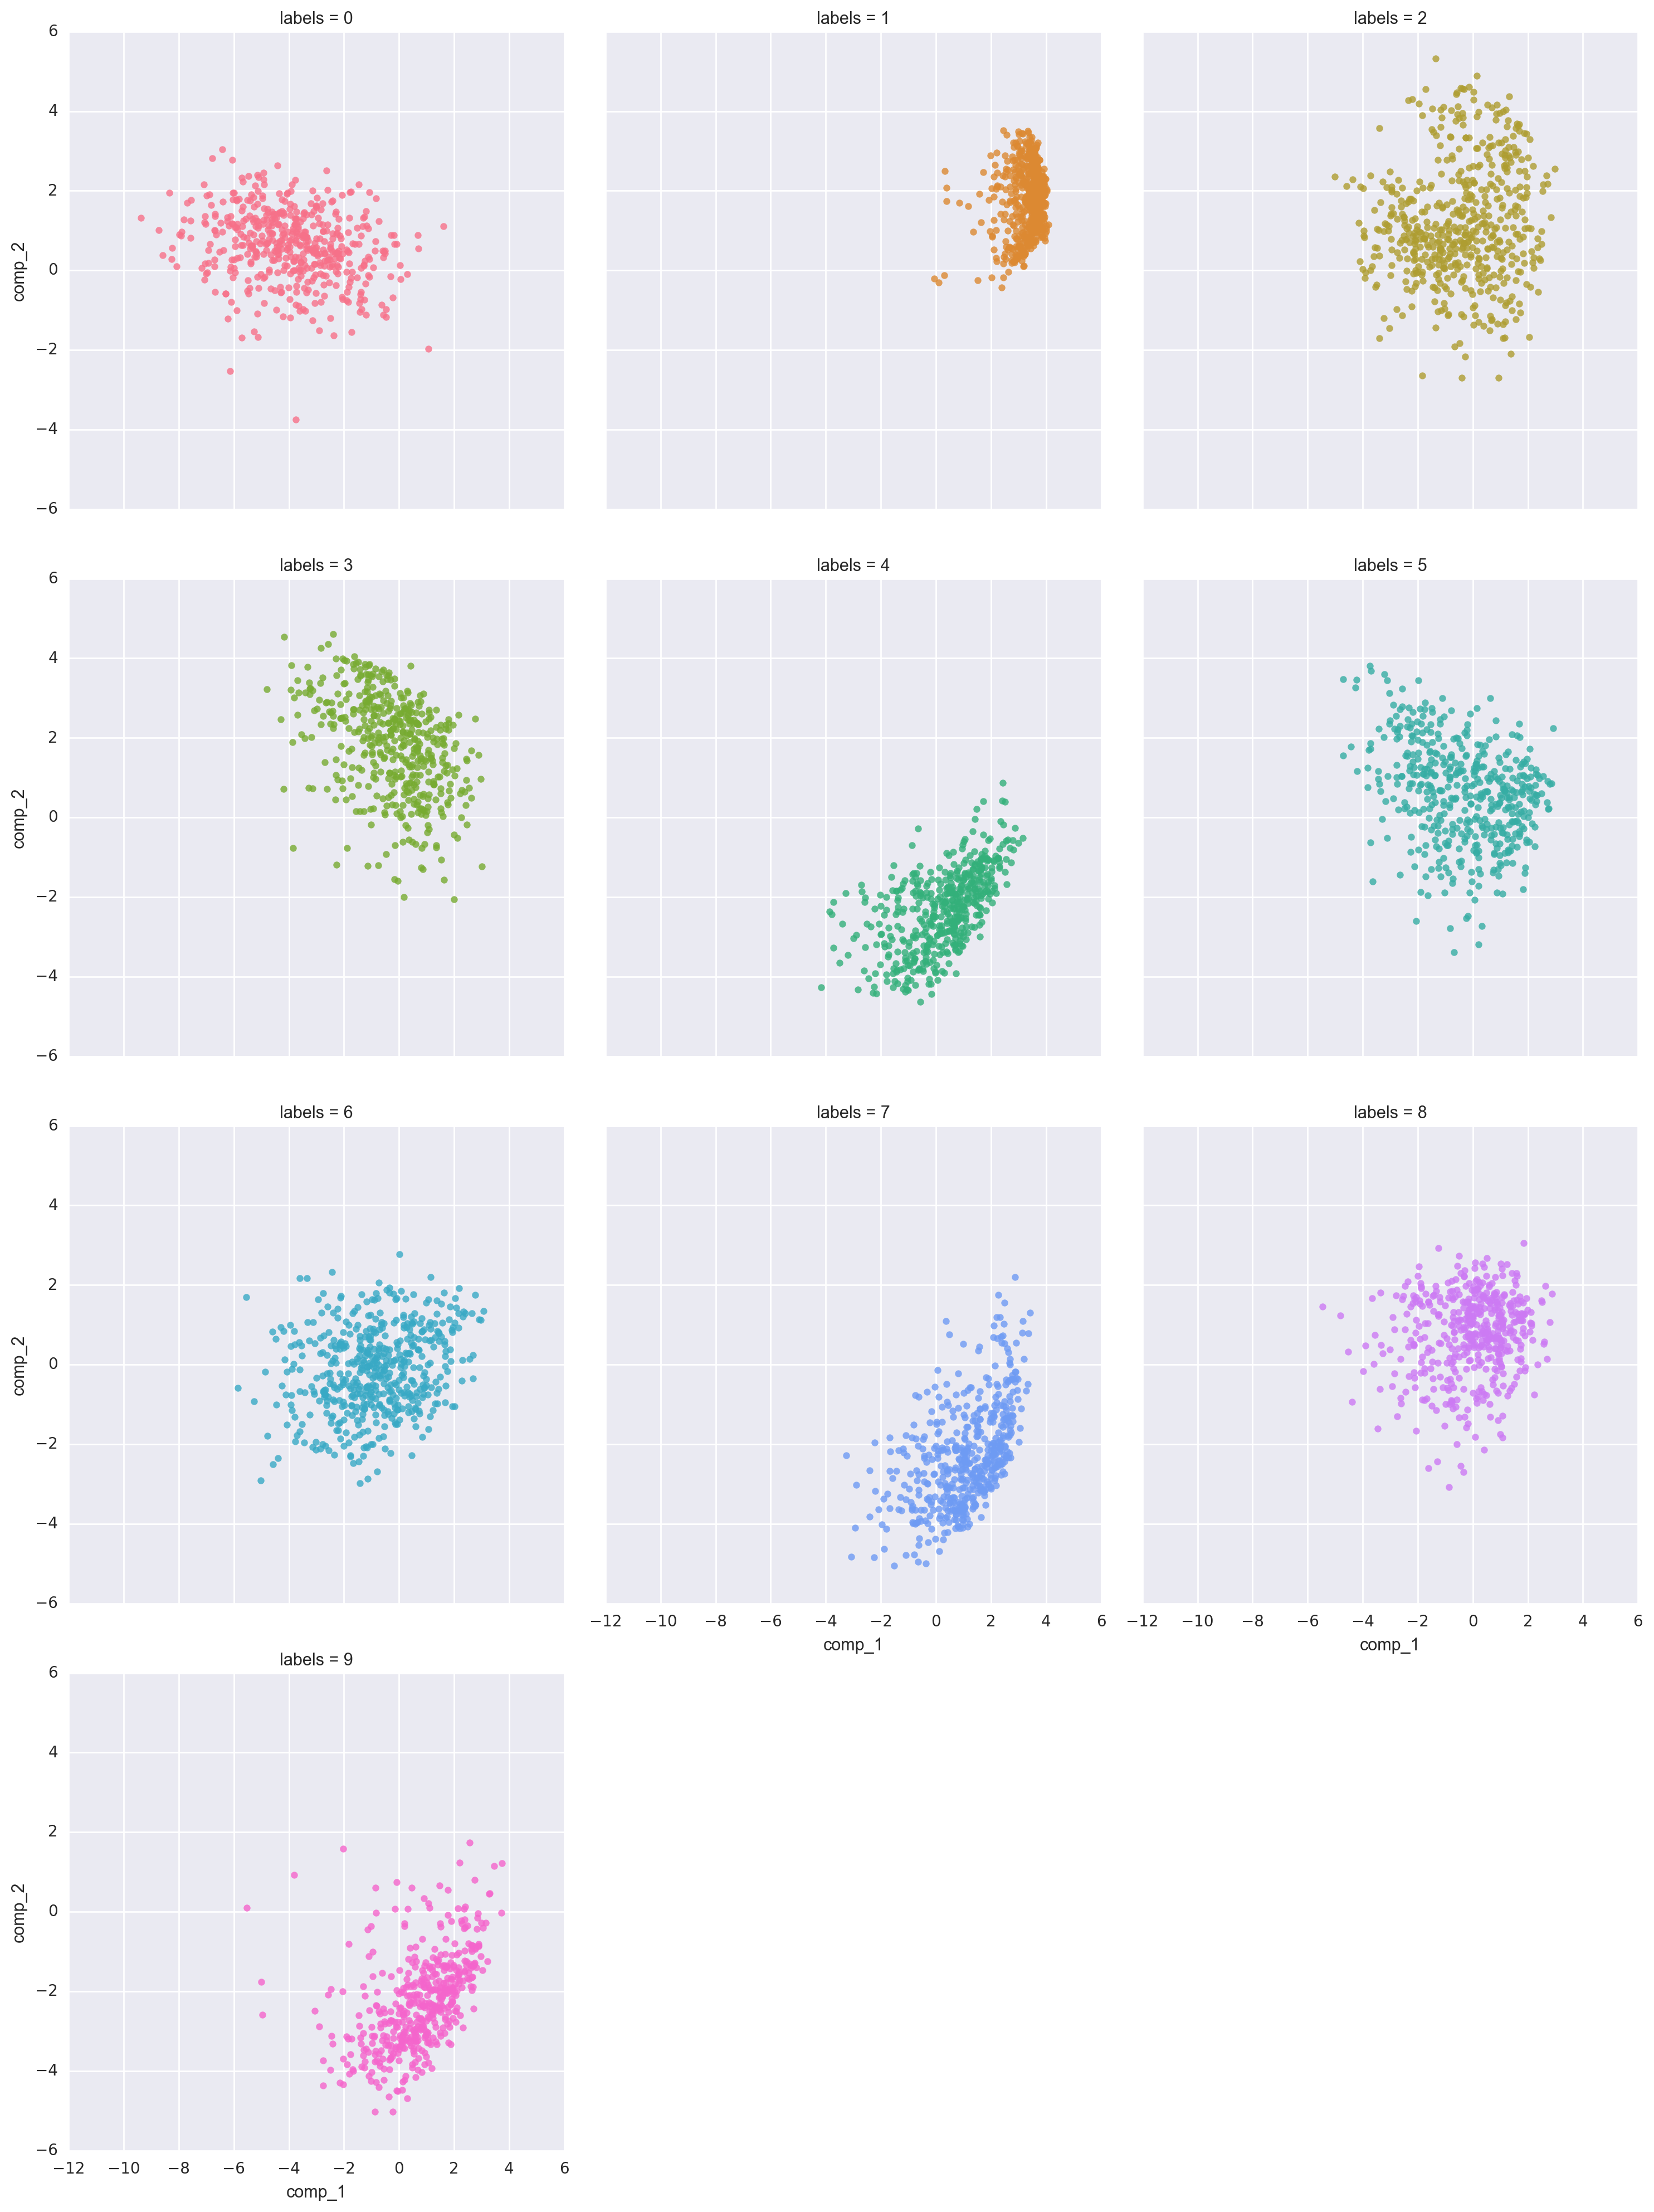

In [29]:
sns.lmplot("comp_1", "comp_2", hue = "labels",data = proj,fit_reg=False, col= "labels",col_wrap=3)

### Creating a Validation Set:

First we need to create a validation set to see how well the model performs on **unseen** data. This is very important!

In [30]:
from sklearn.cross_validation import train_test_split

In [31]:
X_tr, X_val, y_tr, y_val = train_test_split(X, y.values, 
                                            test_size = 0.2, 
                                            stratify = y,
                                            random_state = 2)

In [32]:
data["label"].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [33]:
X_val.shape

(8399, 784)

### Building a Model:

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [35]:
model = KNeighborsClassifier(n_neighbors=5)

In [56]:
model = LogisticRegression(solver = "sag")

In [46]:
model = RandomForestClassifier(n_estimators=10)

In [47]:
model.fit(X_tr, y_tr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [48]:
preds = model.predict(X_val)

In [50]:
confusion_matrix = pd.crosstab(y_val, preds)

In [51]:
confusion_matrix

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,809,0,1,0,1,3,9,0,3,0
1,0,918,3,3,3,1,2,1,6,0
2,5,2,788,4,2,6,6,15,5,2
3,8,4,27,787,1,17,1,6,16,3
4,0,4,2,1,768,2,6,0,3,28
5,7,0,4,20,4,699,9,3,9,4
6,2,6,9,2,4,8,794,0,2,0
7,1,8,19,7,8,1,0,815,4,17
8,2,8,12,19,11,17,4,1,733,6


In [53]:
np.mean(preds == y_val)

0.93654006429336822

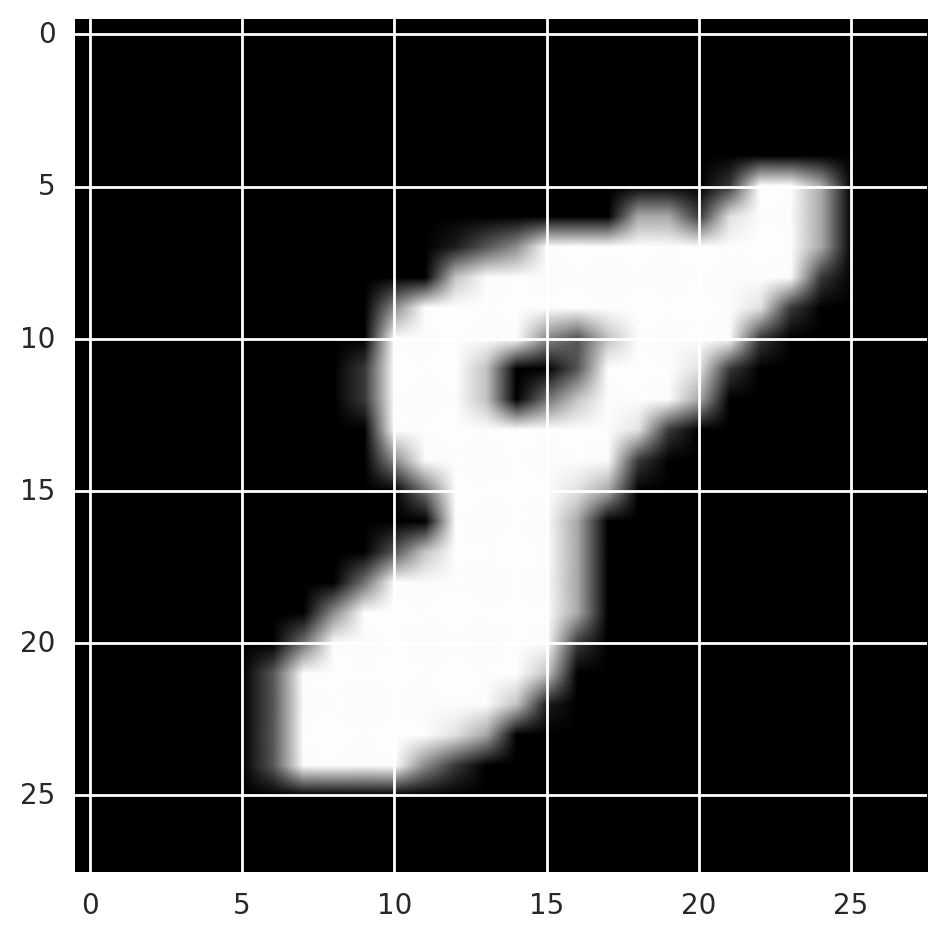

In [54]:
plt.imshow(X_val[110].reshape(28, 28), cmap = "gray")

In [55]:
model.predict(X_val[110])

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([8])

In [ ]:
X_proj.shape

### Visualizing Decision boundaries:

In [57]:
model.fit(X_proj, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='sag', tol=0.0001,
          verbose=0, warm_start=False)

In [58]:
proj["preds"] = model.predict(X_proj[:5000])

In [59]:
proj.head()

,comp_1,comp_2,labels,preds
0,2.594493,2.742397,1,1
1,-6.672360,1.413928,0,0
2,3.478017,1.152023,1,1
3,0.650022,-1.177187,4,9
4,-7.543960,1.761385,0,0


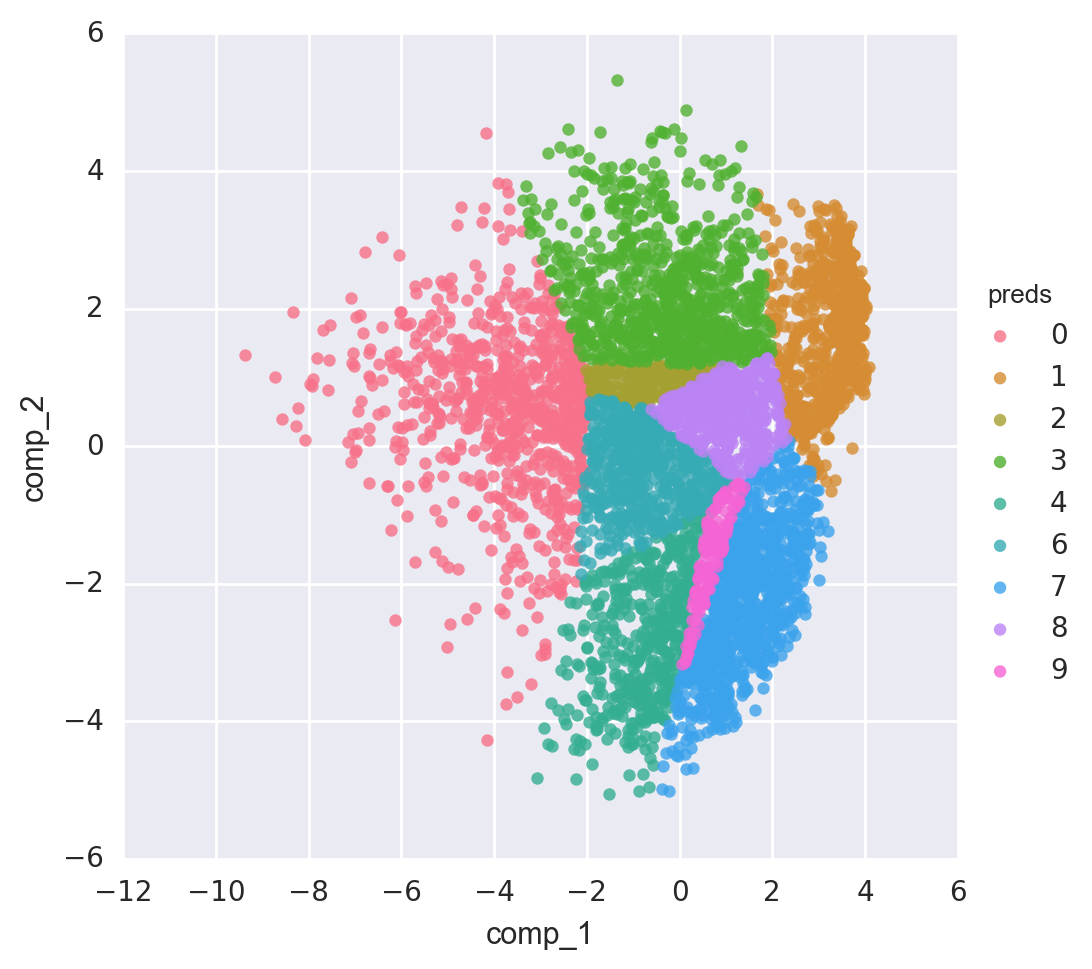

In [60]:
sns.lmplot("comp_1", "comp_2", hue = "preds",data = proj,fit_reg=False)

### Neural Nets:

In [61]:
from keras.models import Sequential
from keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten
from keras.utils.np_utils import to_categorical

Using Theano backend.


In [62]:
y_cat = to_categorical(y_tr)
y_cat_val = to_categorical(y_val)

In [63]:
model = Sequential()
model.add(Dense(10, activation="softmax", input_dim=784))

In [64]:
X_tr.shape

(33601, 784)

In [65]:
model.compile(loss = "categorical_crossentropy", optimizer="adam", metrics = ["accuracy"])

In [66]:
model.fit(X_tr, y_cat, validation_data=(X_val, y_cat_val), nb_epoch=10, batch_size=128)

Train on 33601 samples, validate on 8399 samples
Epoch 1/10
33601/33601 [==============================] - 0s - loss: 0.8143 - acc: 0.8071 - val_loss: 0.4945 - val_acc: 0.8724
Epoch 2/10
33601/33601 [==============================] - 0s - loss: 0.4161 - acc: 0.8917 - val_loss: 0.3949 - val_acc: 0.8911
Epoch 3/10
33601/33601 [==============================] - 0s - loss: 0.3515 - acc: 0.9056 - val_loss: 0.3567 - val_acc: 0.8997
Epoch 4/10
33601/33601 [==============================] - 0s - loss: 0.3218 - acc: 0.9114 - val_loss: 0.3359 - val_acc: 0.9071
Epoch 5/10
33601/33601 [==============================] - 0s - loss: 0.3038 - acc: 0.9163 - val_loss: 0.3244 - val_acc: 0.9111
Epoch 6/10
33601/33601 [==============================] - 0s - loss: 0.2914 - acc: 0.9188 - val_loss: 0.3166 - val_acc: 0.9109
Epoch 7/10
33601/33601 [==============================] - 0s - loss: 0.2822 - acc: 0.9216 - val_loss: 0.3107 - val_acc: 0.9131
Epoch 8/10
33601/33601 [==============================] - 0s -

In [67]:
model = Sequential()
model.add(Dense(256, activation="relu", input_dim=784))
model.add(Dense(256))
model.add(Dense(10, activation = "softmax"))

In [68]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_2 (Dense)                  (None, 256)           200960      dense_input_2[0][0]              
____________________________________________________________________________________________________
dense_3 (Dense)                  (None, 10)            2570        dense_2[0][0]                    
Total params: 203530
____________________________________________________________________________________________________


In [ ]:
*513

In [70]:
model.compile(loss = "categorical_crossentropy", optimizer="adam", metrics = ["accuracy"])

In [71]:
model.fit(X_tr, y_cat, validation_data=(X_val, y_cat_val), nb_epoch=10, batch_size=128)

Train on 33601 samples, validate on 8399 samples
Epoch 1/10
33601/33601 [==============================] - 1s - loss: 0.3930 - acc: 0.8913 - val_loss: 0.2376 - val_acc: 0.9302
Epoch 2/10
33601/33601 [==============================] - 1s - loss: 0.1761 - acc: 0.9504 - val_loss: 0.1733 - val_acc: 0.9495
Epoch 3/10
33601/33601 [==============================] - 1s - loss: 0.1234 - acc: 0.9655 - val_loss: 0.1478 - val_acc: 0.9549
Epoch 4/10
33601/33601 [==============================] - 1s - loss: 0.0954 - acc: 0.9732 - val_loss: 0.1256 - val_acc: 0.9615
Epoch 5/10
33601/33601 [==============================] - 1s - loss: 0.0727 - acc: 0.9799 - val_loss: 0.1102 - val_acc: 0.9652
Epoch 6/10
33601/33601 [==============================] - 1s - loss: 0.0584 - acc: 0.9832 - val_loss: 0.1046 - val_acc: 0.9692
Epoch 7/10
33601/33601 [==============================] - 1s - loss: 0.0456 - acc: 0.9879 - val_loss: 0.1031 - val_acc: 0.9667
Epoch 8/10
33601/33601 [==============================] - 1s -

In [72]:
X_tr = X_tr.reshape(X_tr.shape[0], 1, 28, 28)
X_val = X_val.reshape(X_val.shape[0], 1, 28, 28)

In [ ]:
model1 = Sequentialuentialuentialuentialuential()
model.add()

In [73]:
model = Sequential()
model.add(Convolution2D(16, 3, 3, activation="relu", input_shape = (1, 28, 28), border_mode="same"))
model.add(MaxPooling2D((2,2)))

model.add(Convolution2D(16, 3, 3, activation="relu", input_shape = (1, 28, 28), border_mode="same"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation = "softmax"))

In [75]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 16, 28, 28)    160         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 16, 14, 14)    0           convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 16, 14, 14)    2320        maxpooling2d_1[0][0]             
____________________________________________________________________________________________________
maxpooling2d_2 (MaxPooling2D)    (None, 16, 7, 7)      0           convolution2d_2[0][0]            
___________________________________________________________________________________________

In [76]:
model.compile(loss = "categorical_crossentropy", optimizer="adam", metrics = ["accuracy"])

In [77]:
model.fit(X_tr, y_cat, validation_data=(X_val, y_cat_val), nb_epoch=10, batch_size=128)

Train on 33601 samples, validate on 8399 samples
Epoch 1/10
33601/33601 [==============================] - 17s - loss: 0.4187 - acc: 0.8731 - val_loss: 0.1564 - val_acc: 0.9505
Epoch 2/10
33601/33601 [==============================] - 17s - loss: 0.1124 - acc: 0.9652 - val_loss: 0.0975 - val_acc: 0.9694
Epoch 3/10
33601/33601 [==============================] - 18s - loss: 0.0708 - acc: 0.9782 - val_loss: 0.0730 - val_acc: 0.9782
Epoch 4/10
33601/33601 [==============================] - 18s - loss: 0.0529 - acc: 0.9835 - val_loss: 0.0620 - val_acc: 0.9784
Epoch 5/10
33601/33601 [==============================] - 19s - loss: 0.0418 - acc: 0.9873 - val_loss: 0.0710 - val_acc: 0.9775
Epoch 6/10
33601/33601 [==============================] - 17s - loss: 0.0367 - acc: 0.9883 - val_loss: 0.0623 - val_acc: 0.9818
Epoch 7/10
33601/33601 [==============================] - 19s - loss: 0.0297 - acc: 0.9908 - val_loss: 0.0542 - val_acc: 0.9836
Epoch 8/10
33601/33601 [==============================]